In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/internet_service_churn.csv')

In [3]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

На цьому этапі бачимо що в нас є колонка ID. На нашу думку, вона не несе ніякого сенсу для моделі, тому ми видляємо її з датасету.

In [5]:
df = df.drop(columns=['id'])

Далі потрібно дізнатися інформацію про данні які залишились, бо зараз ми не розуміємо формату данних та кількості пропущенних данних.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             72274 non-null  int64  
 1   is_movie_package_subscriber  72274 non-null  int64  
 2   subscription_age             72274 non-null  float64
 3   bill_avg                     72274 non-null  int64  
 4   reamining_contract           50702 non-null  float64
 5   service_failure_count        72274 non-null  int64  
 6   download_avg                 71893 non-null  float64
 7   upload_avg                   71893 non-null  float64
 8   download_over_limit          72274 non-null  int64  
 9   churn                        72274 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.5 MB


In [7]:
df.describe(include='int64')

,is_tv_subscriber,is_movie_package_subscriber,bill_avg,service_failure_count,download_over_limit,churn
count,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000
mean,0.815259,0.334629,18.942483,0.274234,0.207613,0.554141
std,0.388090,0.471864,13.215386,0.816621,0.997123,0.497064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,19.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,22.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,406.000000,19.000000,7.000000,1.000000


In [8]:
df.describe(include='float64')

,subscription_age,reamining_contract,download_avg,upload_avg
count,72274.000000,50702.000000,71893.000000,71893.000000
mean,2.450051,0.716039,43.689911,4.192076
std,2.034990,0.697102,63.405963,9.818896
min,-0.020000,0.000000,0.000000,0.000000
25%,0.930000,0.000000,6.700000,0.500000
50%,1.980000,0.570000,27.800000,2.100000
75%,3.300000,1.310000,60.500000,4.800000
max,12.800000,2.920000,4415.200000,453.300000


In [9]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
reamining_contract,21572
download_avg,381
upload_avg,381


На основі аналізу данних, маєму наступні висновки:


*   **is_tv_subscriber**: Чи є клієнт підписником телевізійного пакета (0 або 1)
*   **is_movie_package_subscriber**: Чи є клієнт підписником пакета фільмів (0 або 1)


*   **subscription_age**: Час, протягом якого клієнт був підписаний на сервіс, вимірюється у роках.
*   **bill_avg**: Середній рахунок клієнта за послуги (можливо, в грошовій одиниці).


*   **reamining_contract**: Кількість років, що залишилися до закінчення контракту. Частина даних відсутня (порожні значення) — лише 50 702 з 72 274 мають значення.
*   **service_failure_count**: Кількість збоїв сервісу для кожного клієнта.


*   **download_avg**: Середня швидкість завантаження даних (можливо, в Мбіт/с). Деякі значення відсутні — 71 893 з 72 274 мають значення.
*   **upload_avg**: Середня швидкість вивантаження даних (можливо, в Мбіт/с). Як і у попередньому стовпці, деякі значення відсутні.


*   **download_over_limit**: Чи перевищив клієнт ліміт завантаження (0 або 1)
*   **churn**: Чи покинув клієнт сервіс (0 — залишився, 1 — відмовився)


З цього виходить що ми будемо вирішувати завдання класифиікаціі де Y в нас це churn а всі інші атрибути будуть параметрами нашої моделі тобто X.






Заповнимо пропущенні данні серднім числом, бо це підходить під конекст данних.

In [10]:
df['reamining_contract'] = df['reamining_contract'].fillna(df['reamining_contract'].mean())
df['download_avg'] = df['download_avg'].fillna(df['download_avg'].mean())
df['upload_avg'] = df['upload_avg'].fillna(df['upload_avg'].mean())

Після операції заповнення середніми значеннями, в датасеті з'являються дублікати. Вірогідно вони і були однакові до цього, але через поле ID рахувало як унікальні.

In [18]:
num_duplicates_after = df.duplicated().sum()
num_duplicates_after

2149

In [12]:
df_without_duplicates = df.drop_duplicates()

In [13]:
num_duplicates_after_del = df_without_duplicates.duplicated().sum()
num_duplicates_after_del

0

In [14]:
missing_values = df_without_duplicates.isnull().sum()
missing_values[missing_values > 0]

,0


Подивимось на роздподіл після заповнення пропущенних данних.

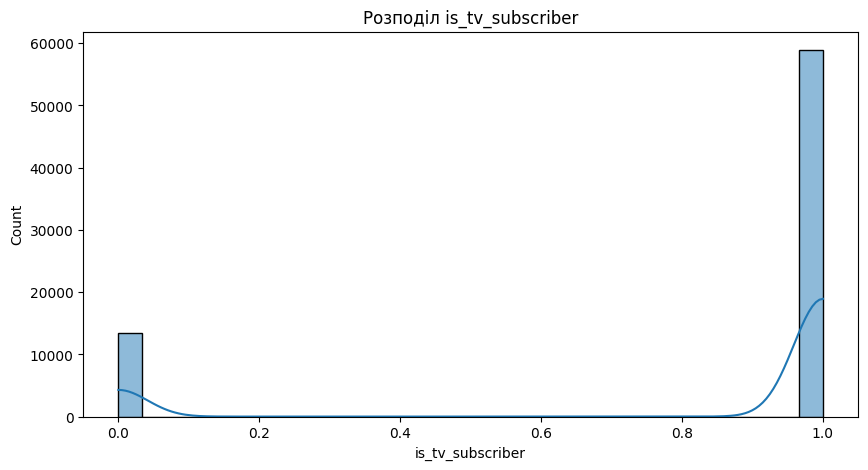

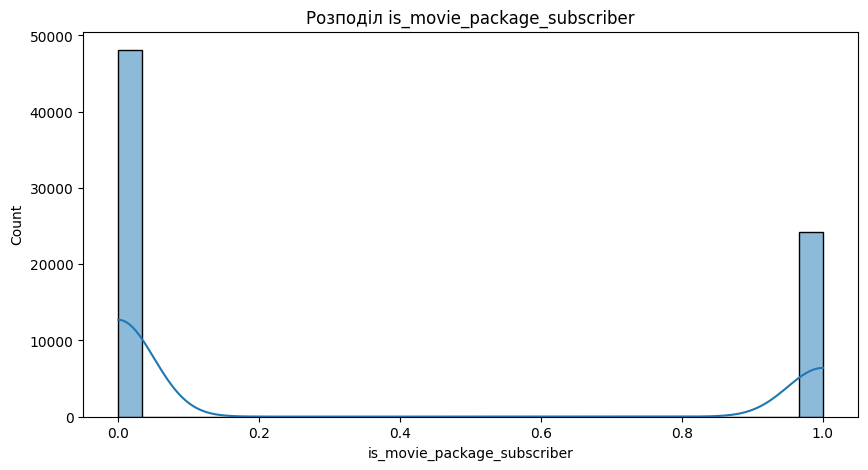

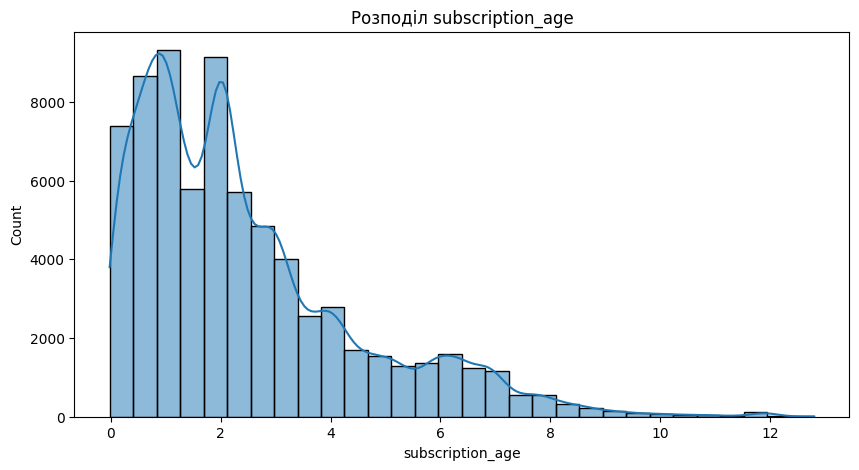

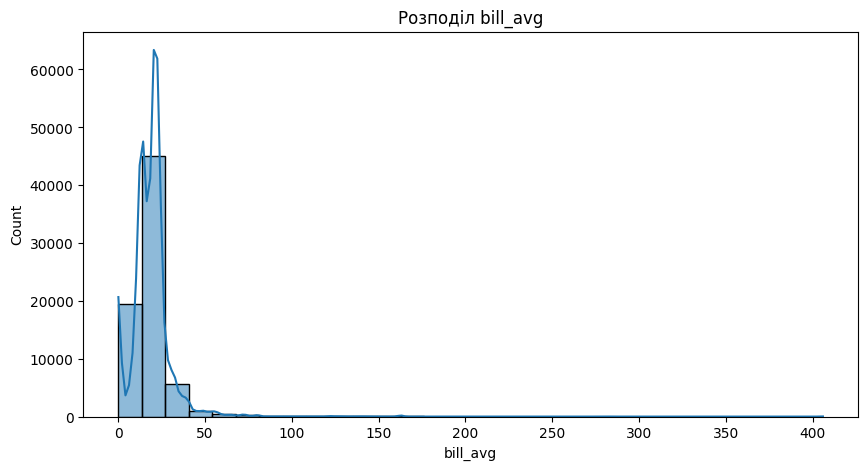

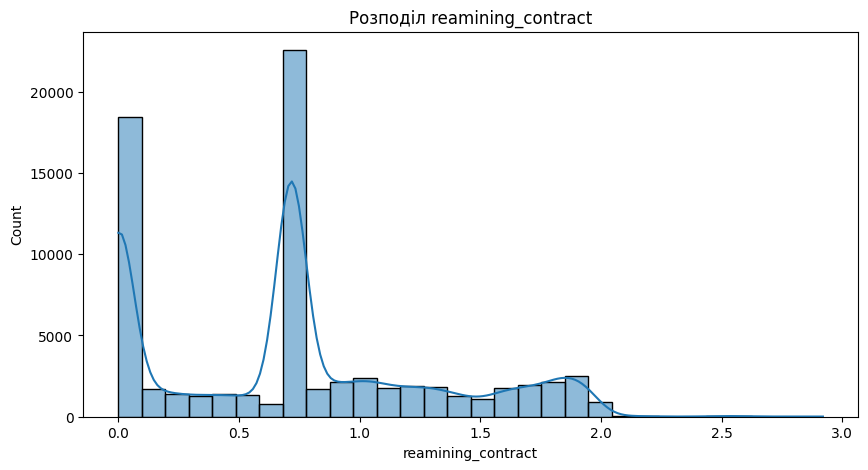

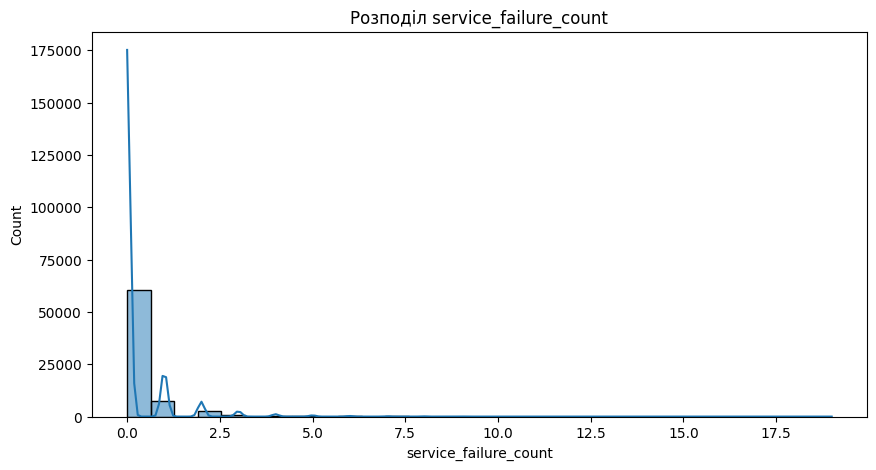

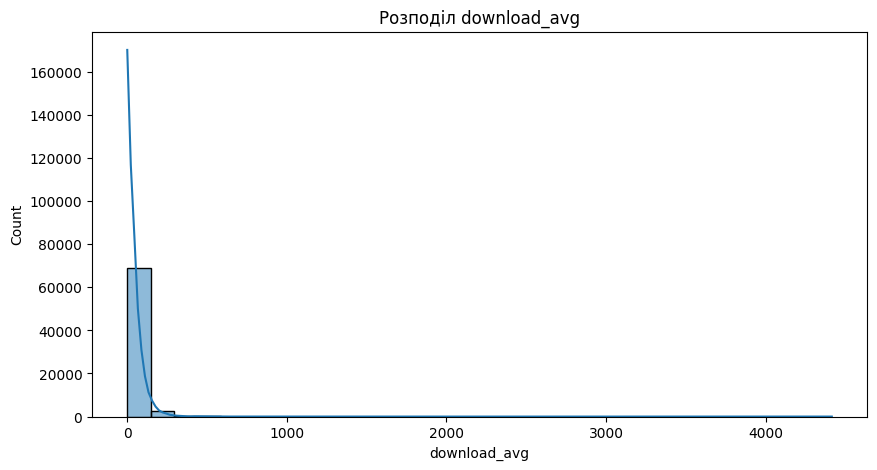

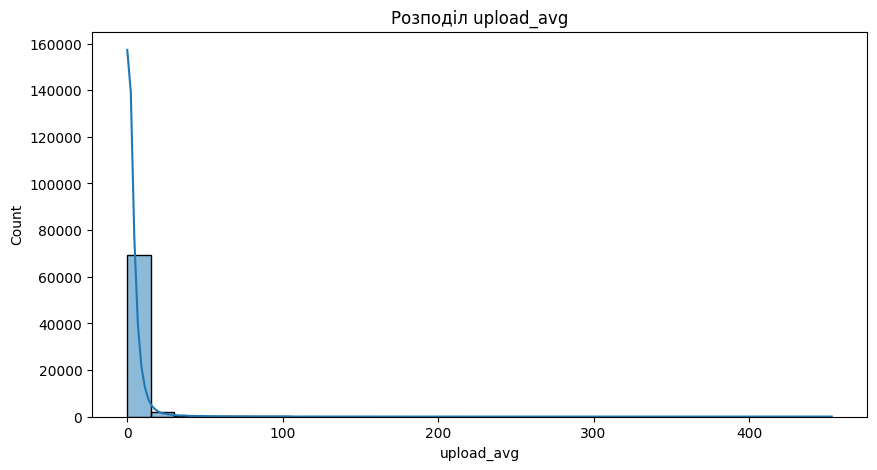

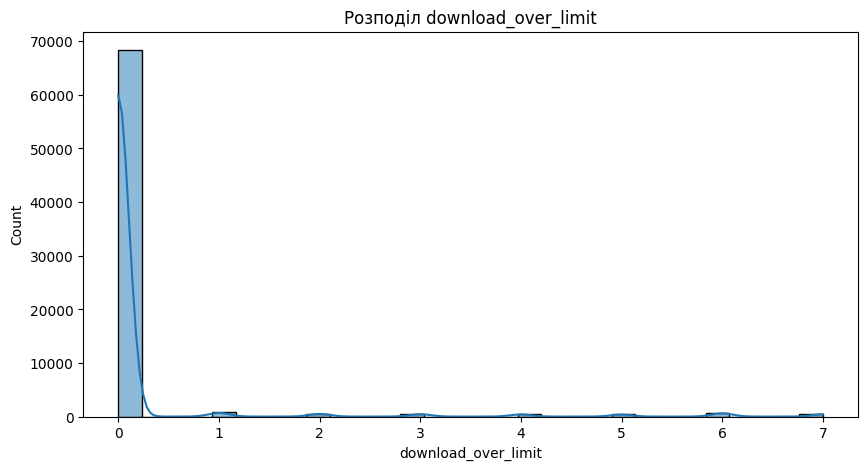

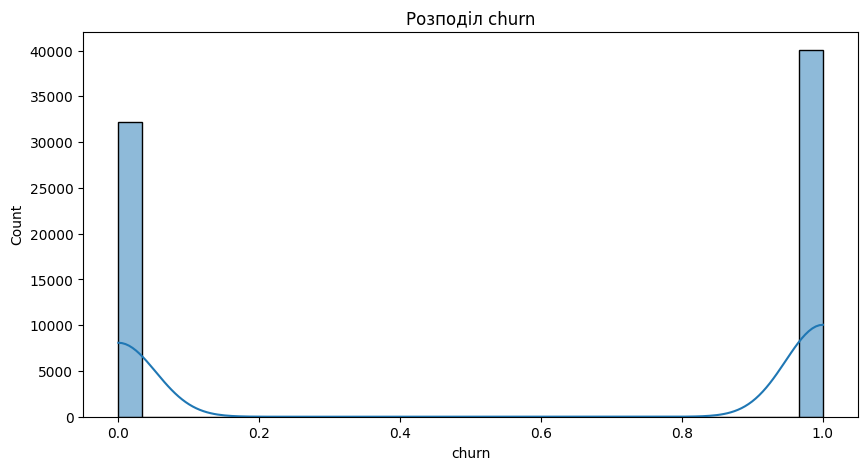

In [15]:
numerical_columns = df_without_duplicates.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Розподіл {column}")
    plt.show()

Тепер потрібно побудувати корреляційну матрицю.

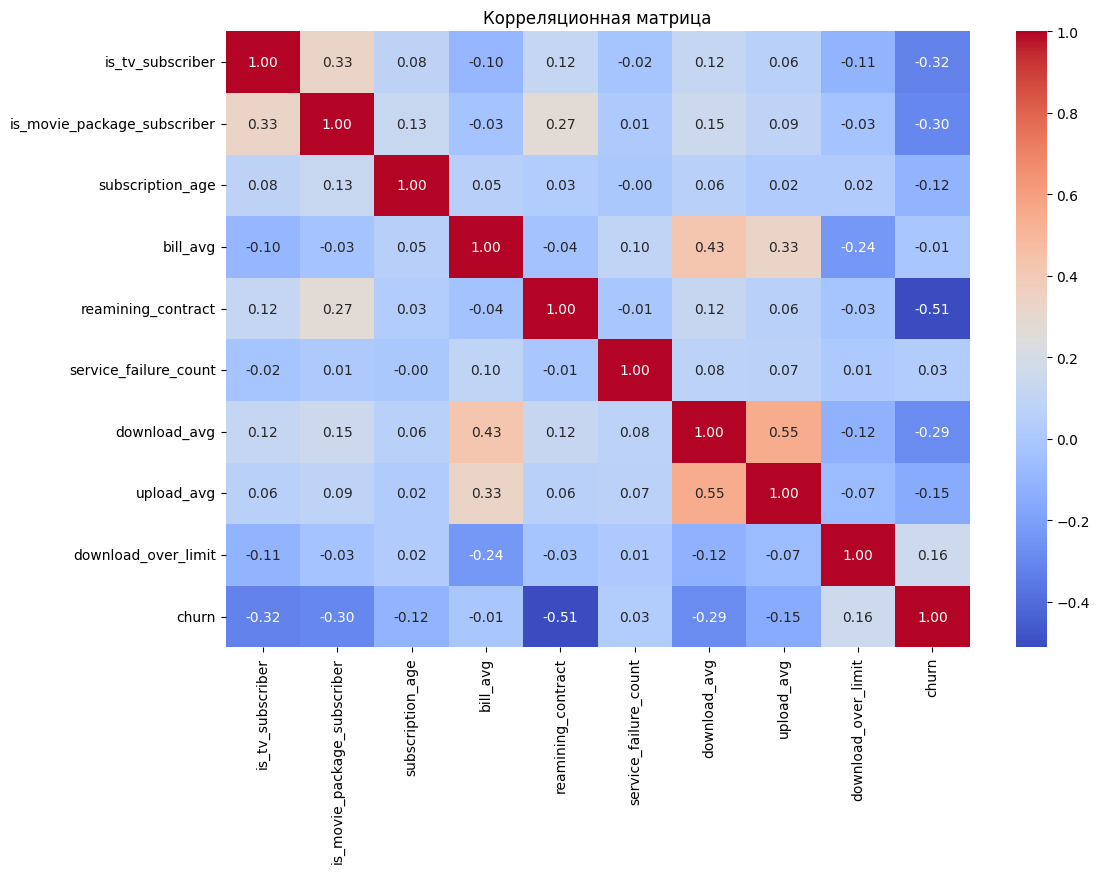

In [16]:
corr_matrix = df_without_duplicates[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

# Опис фінального датасету
**Початковий датасет:**

internet_service_churn.csv

**Джерело:**

Технічне завдання

**Параметри:**

is_tv_subscriber, is_movie_package_subscriber, subscription_age, bill_avg, reamining_contract, service_failure_count, download_avg, upload_avg, download_over_limit.

**Процессінг данних:**

Заповнені пропущенні данні середніми значеннями. Видалені дублікати.

Завантаження датасету:

In [17]:
df_without_duplicates.to_csv('prepared_internet_service_churn.csv', index=False)